# Informações
* O código realiza o preenchimento dos Datasets de dados meteorológicos 

# Importações 

In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os
from sklearn.linear_model import LinearRegression

# Lista de arquivos contidos nas pastas 

In [12]:
path = r'C:\Arquivos_Met'
out_put = r'C:\Dados_Preenchidos_Final'
arquivos = os.listdir(path)

# Função para identificar registros faltantes e preencher com a Interpolação 
* Identifica o número de registros faltantes a partir do 1º dado registrado e do útlimo

In [31]:
def PREE_INTER(data, name):
    
    #As plotagens de gráficos podem ser retiradas isso foi apenas para realizar alguns testes e vericar os dados preenchidos
    plt.figure(figsize=(20, 6))
    plt.plot(data['TEMPMED (C) (MD)'])
    plt.show()
    
    #Cria um índce completo com as datas faltantes 
    data_missing = data.resample('D').asfreq()
    
    #Descobre as linhas com valores faltantes
    idx_faltantes = data_missing.isna()
    
    #Aplica a interpolação nos dados faltantes 
    data_missing.interpolate(method='linear', inplace=True)
    df_complete = data_missing.resample('D').asfreq()
    
    #As plotagens de gráficos podem ser retiradas isso foi apenas para realizar alguns testes e vericar os dados preenchidos
    plt.figure(figsize=(20, 6))
    plt.plot(df_complete['TEMPMED (C) (MD)'], color = 'red')
    plt.show()
    
    #df_complete.reset_index(inplace = True)
    # Converter as datas para o formato desejado
    df_complete['DATA'] = df_complete.index.strftime('%Y-%m-%d')

    #display(df_complete)
    #Alterar esse código (retire o 1) isso foi apenas para criar arquivos diferentes na pasta 
    save = out_put+'\\'+'_1_'+name
    df_complete.to_excel(save)
    print("Arquivo Salvo...")


# Função para identificar registros faltantes e preencher com a regressão

In [32]:

def PREE_REG(data, name):
    
    #As plotagens de gráficos podem ser retiradas isso foi apenas para realizar alguns testes e vericar os dados preenchidos
    plt.figure(figsize=(20, 6))
    plt.plot(data['TEMPMED (C) (MD)'])
    plt.show()
    
    #Cria um índce completo com as datas faltantes 
    data_missing = data.resample('D').asfreq()
    
    #Descobre as linhas com valores faltantes
    idx_faltantes = data_missing.isna()
    
    #Aplica a regressão nos dados faltantes 
    
    for coluna in data_missing.columns:
        y = data_missing[coluna]
        x = np.arange(len(y)).reshape(-1, 1)
        x_pred = np.arange(len(y))[idx_faltantes[coluna]].reshape(-1, 1)
        reg = LinearRegression().fit(x[~np.isnan(y)], y[~np.isnan(y)])
        y_pred = reg.predict(x_pred)
        data_missing.loc[idx_faltantes[coluna], coluna] = y_pred


    df_complete = data_missing.resample('D').asfreq()
    
    #As plotagens de gráficos podem ser retiradas isso foi apenas para realizar alguns testes e vericar os dados preenchidos
    plt.figure(figsize=(20, 6))
    plt.plot(df_complete['TEMPMED (C) (MD)'], color = 'orange')
    plt.show()
    
    save = out_put+'\\'+name
    df_complete.to_excel(save)
    print("Arquivo Salvo...")


# Código para abertura e chamada do método de preechimento

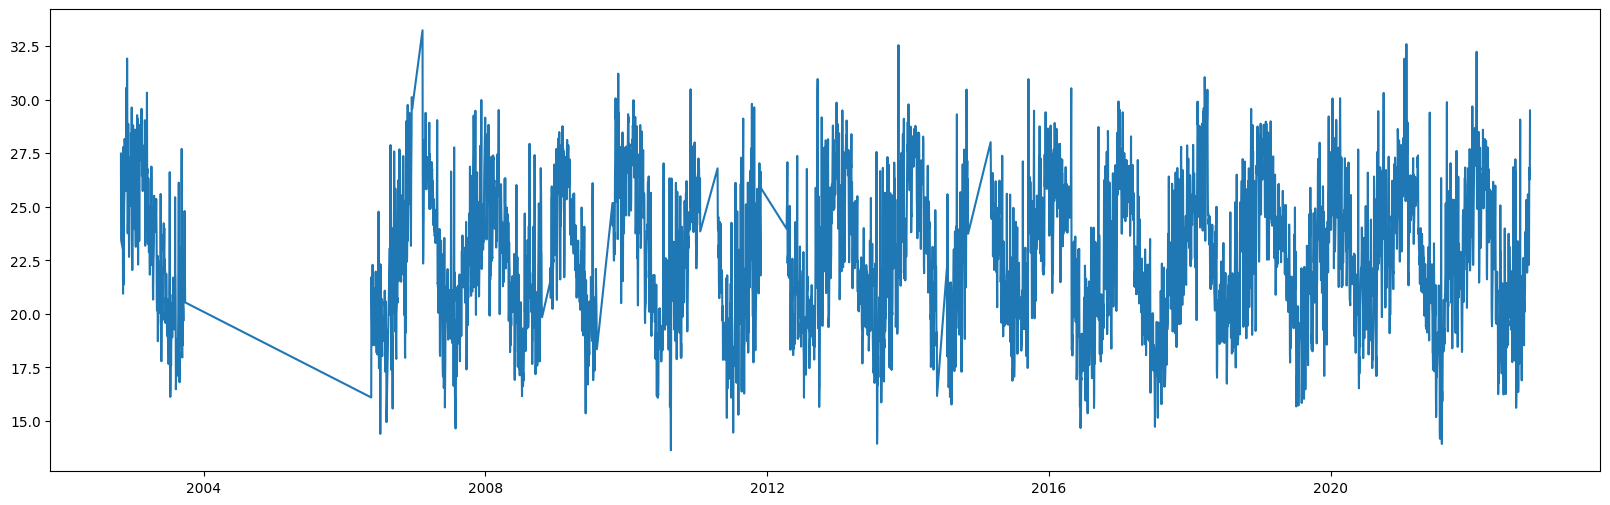

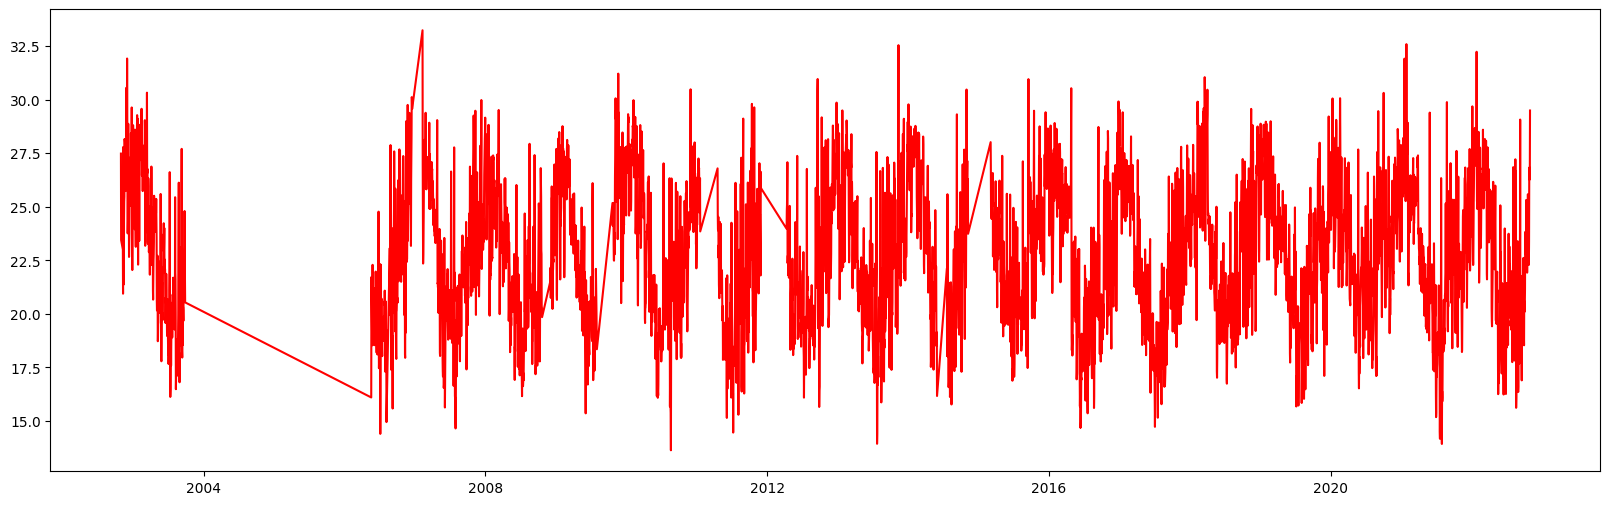

Arquivo Salvo...


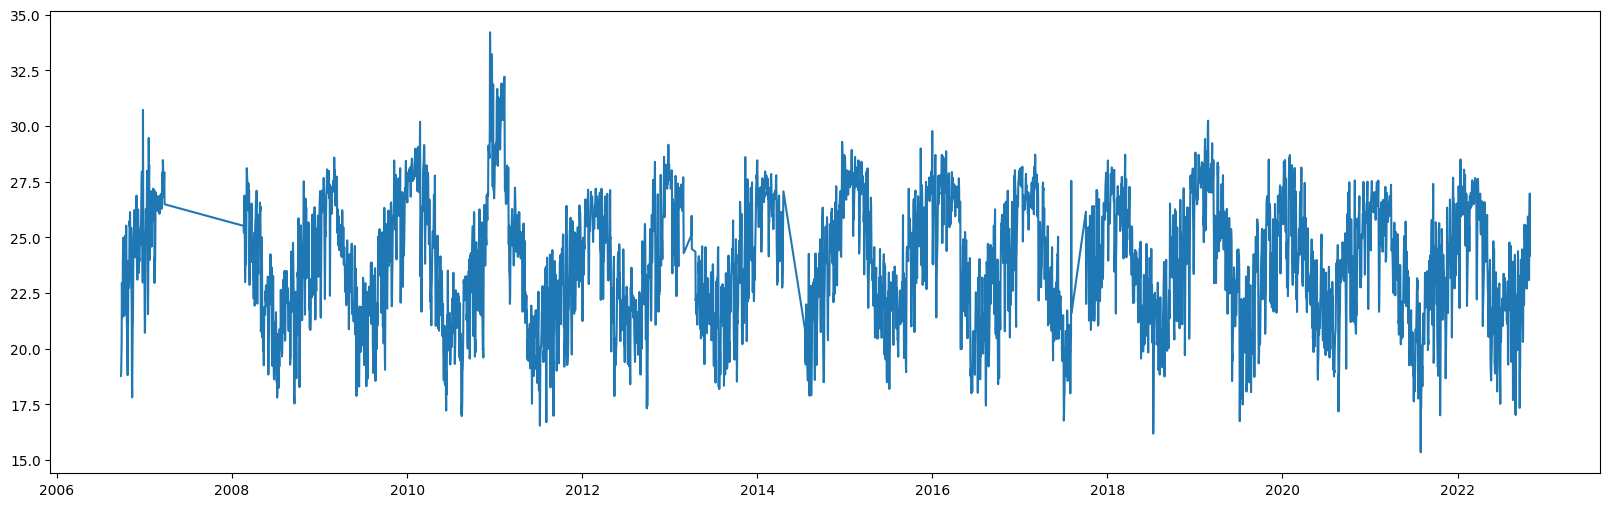

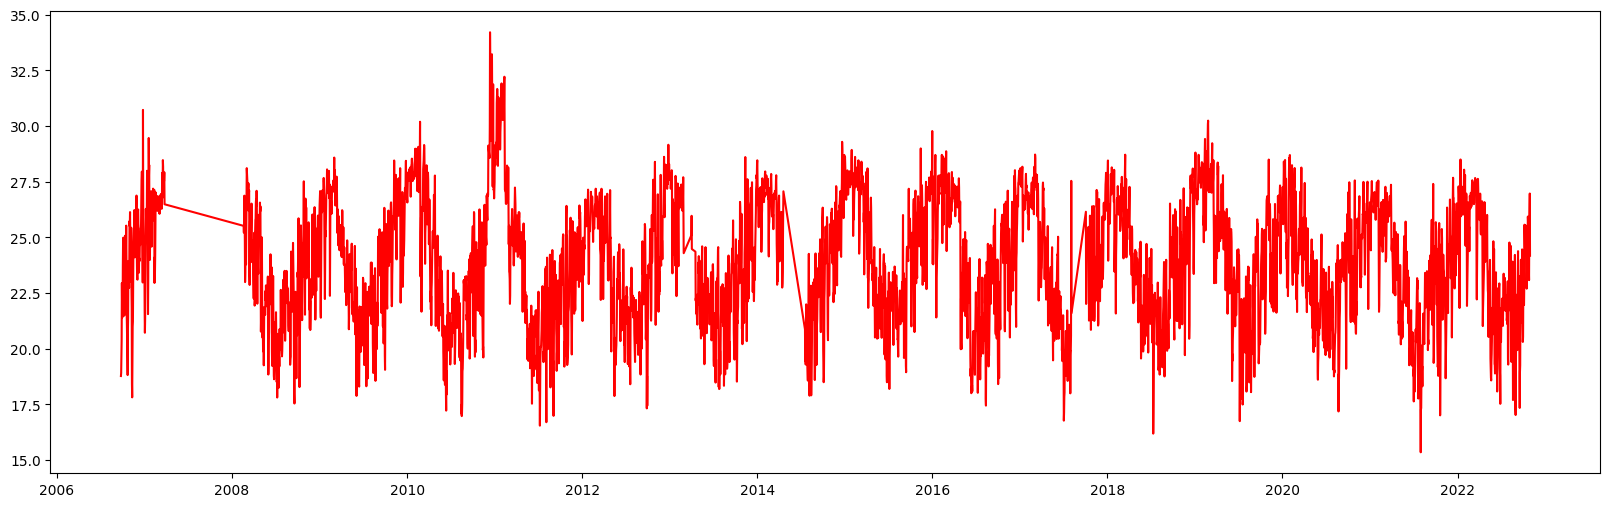

Arquivo Salvo...


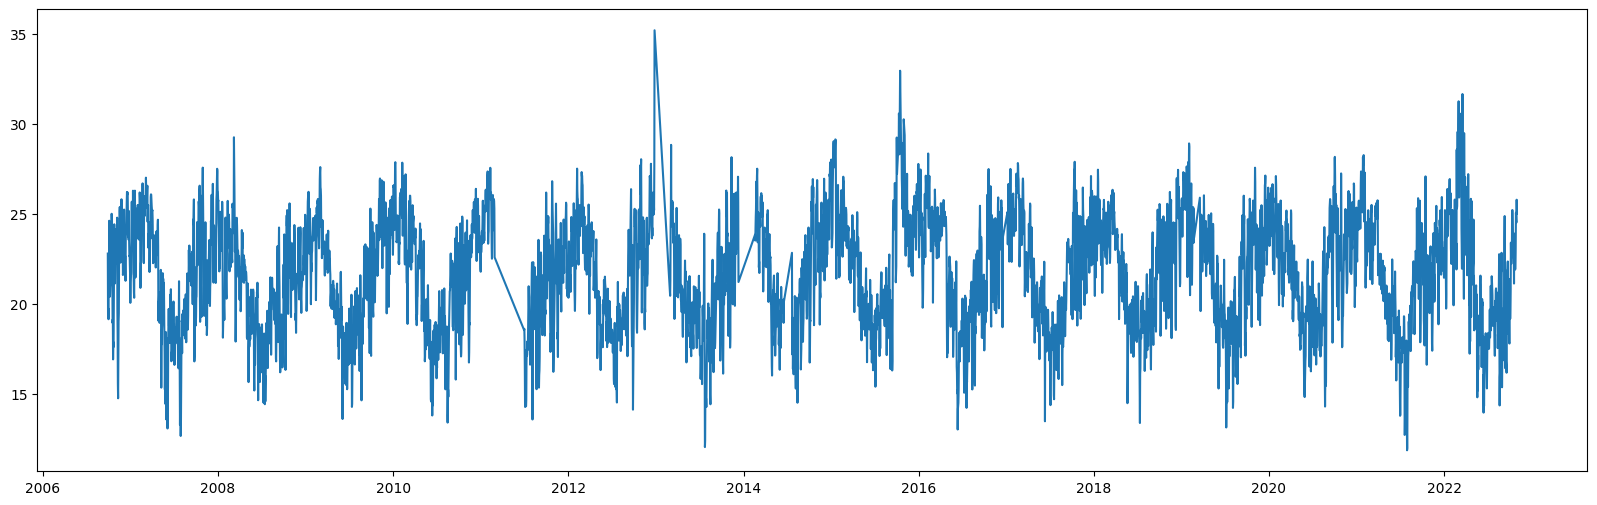

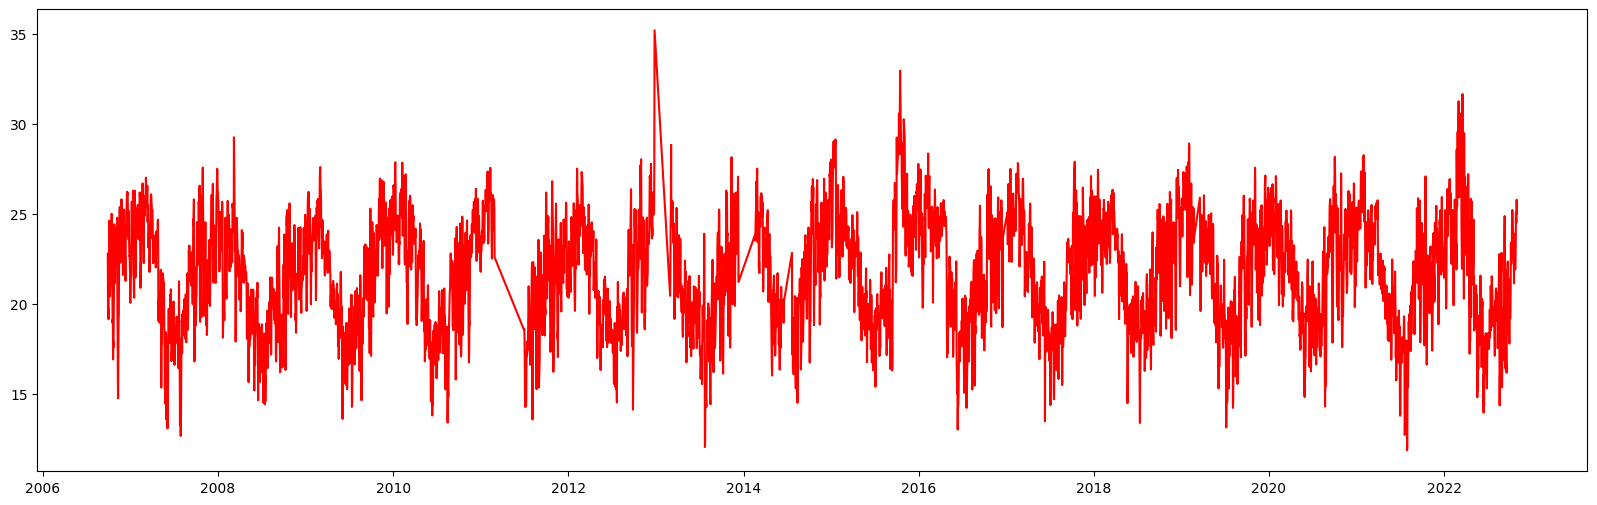

Arquivo Salvo...


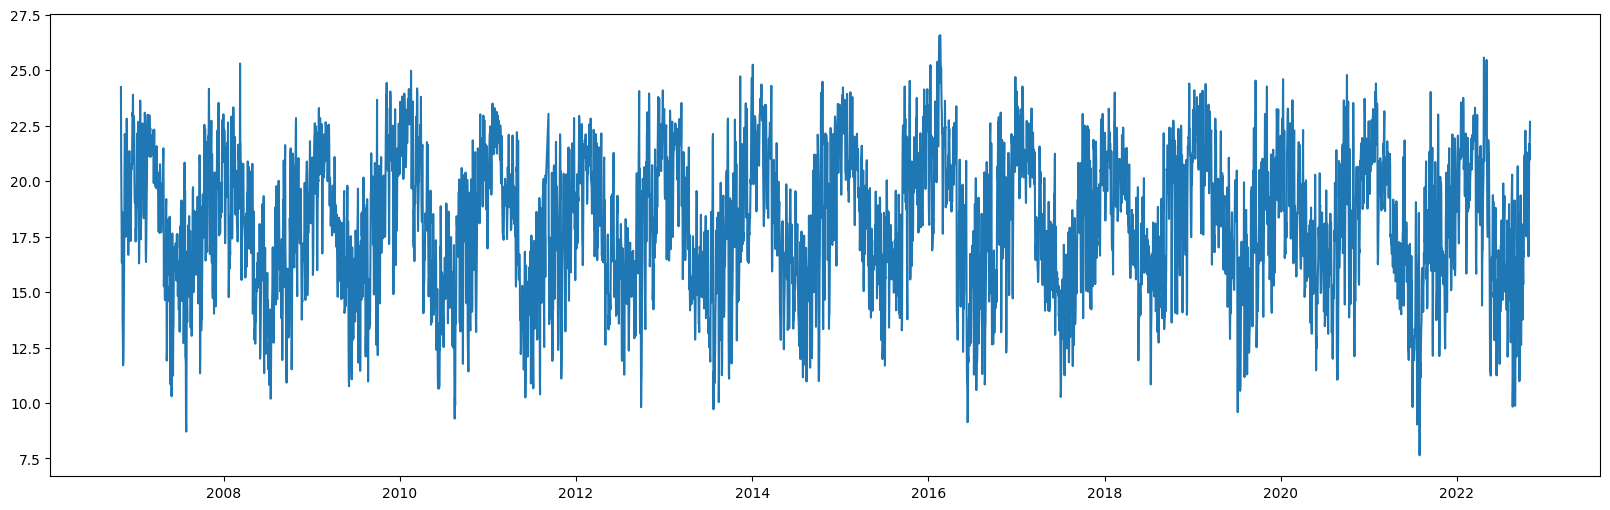

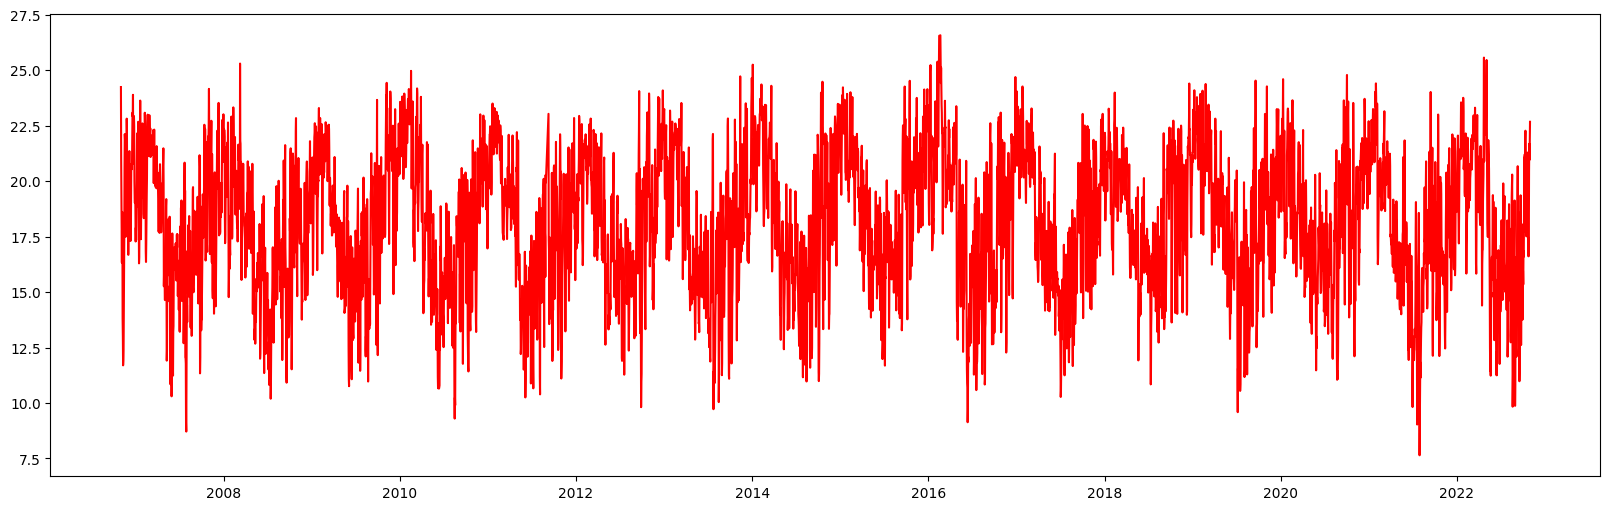

Arquivo Salvo...


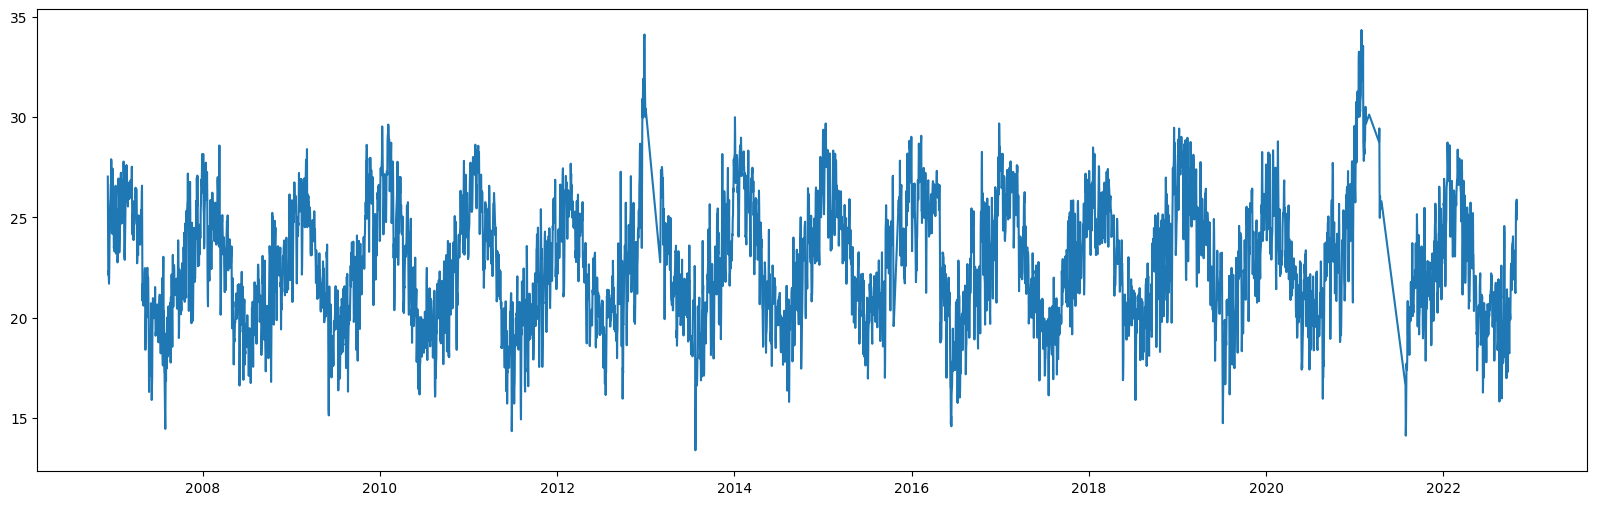

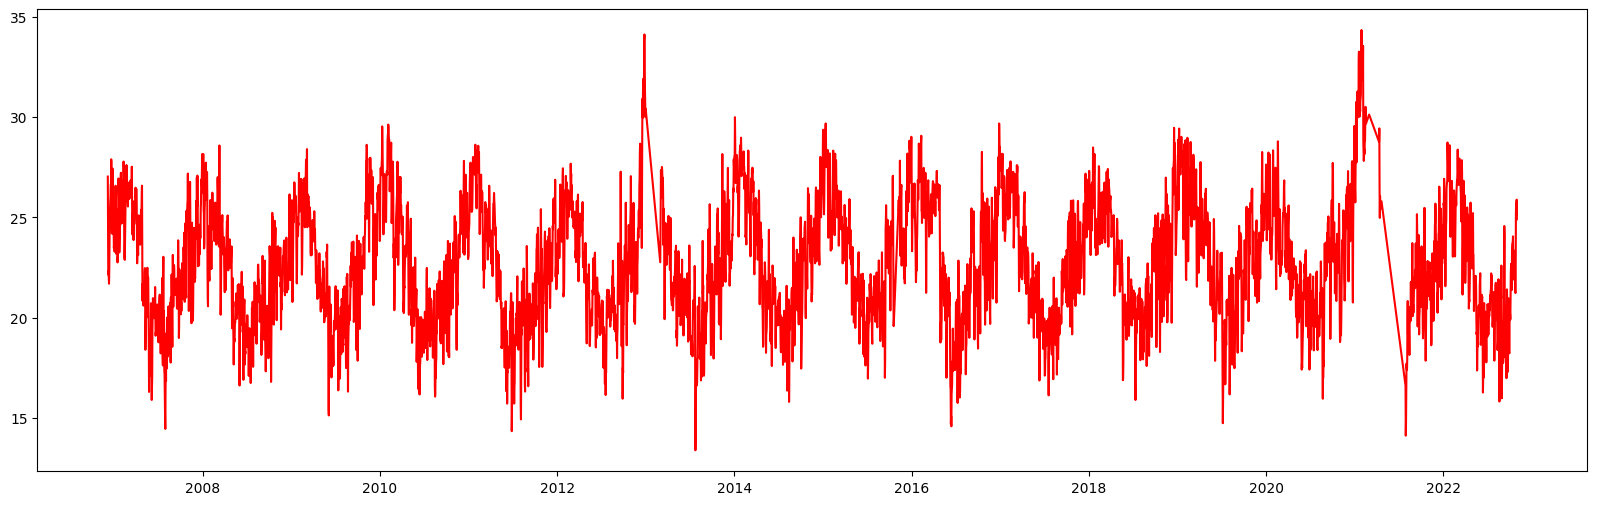

Arquivo Salvo...


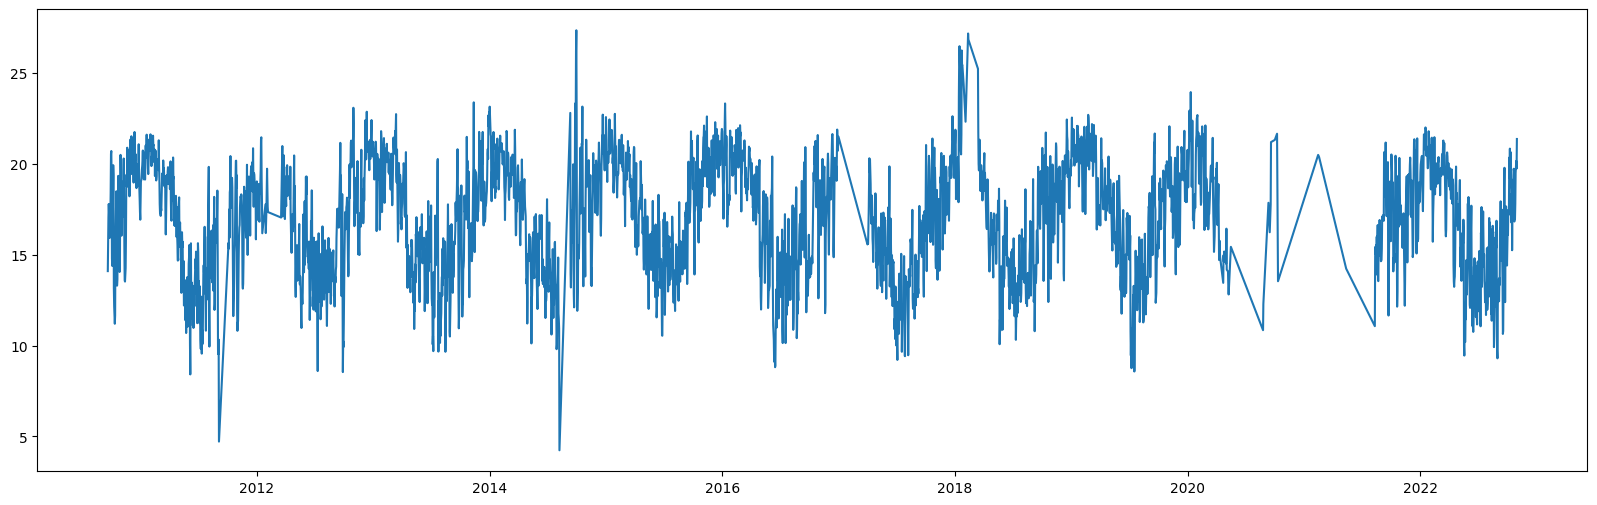

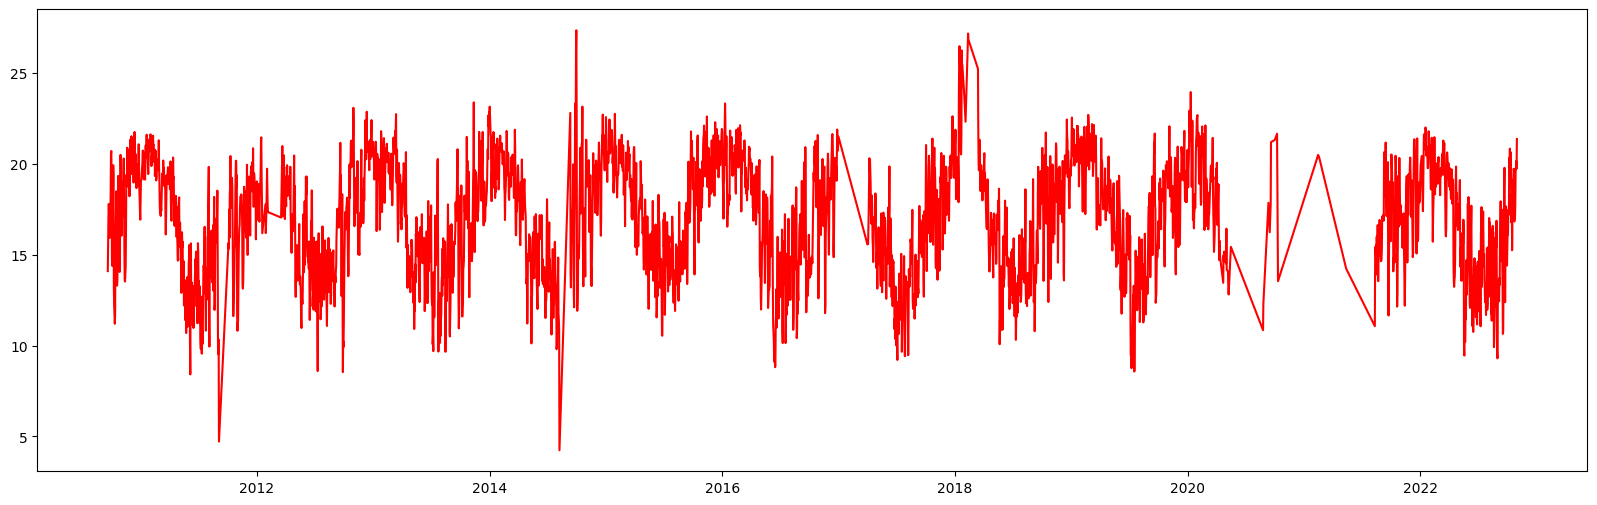

Arquivo Salvo...


In [33]:
for i in arquivos:
    
    # monta o caminho de cada arquivo que esta na pasta 
    caminho = path+"\\"+i
    
    # Realiza a abertura do arquivo 
    df = pd.read_excel(caminho, index_col = 'DATA', parse_dates = True)
    
    PREE_INTER(df, i)
    
   
    
    
    
    
    
    
    